# Linear Regression


In [2]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [4]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

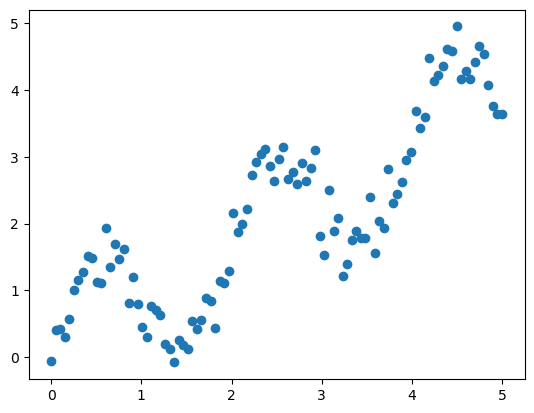

In [6]:
plt.scatter(x,y)

#### nonlinear

In [8]:
regr_lin = LinearRegression()

In [10]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [12]:
regr_lin.fit(X,y)

LinearRegression()

0.5678572292421076


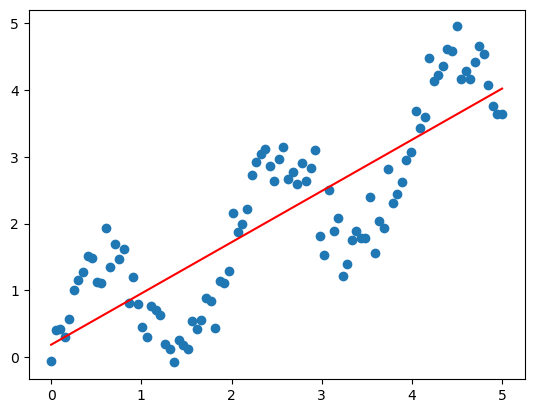

In [14]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [11]:
print(x.shape)

(100,)


In [28]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [30]:
regr_poly = LinearRegression()

In [32]:
regr_poly.fit(X_poly, y)

LinearRegression()

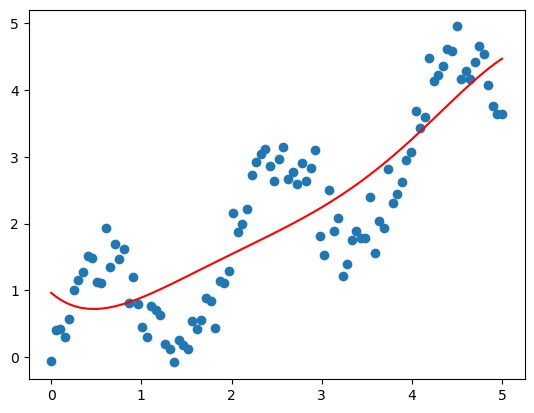

In [34]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [36]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.15736388  1.68234401 -0.73603382  0.15052761 -0.01115001]
interception:  0.9632843590249061


In [38]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.96328436, 0.90902905, 0.86280093, 0.82406579, 0.79231203,
       0.76705026, 0.74781282, 0.73415336, 0.7256464 , 0.72188689,
       0.72248976, 0.72708949, 0.73533968, 0.74691258, 0.76149868,
       0.77880627, 0.79856097, 0.82050532, 0.84439833, 0.87001504,
       0.89714609, 0.92559725, 0.95518903, 0.98575618, 1.01714731,
       1.04922442, 1.08186244, 1.11494884, 1.14838315, 1.18207653,
       1.21595136, 1.24994074, 1.28398812, 1.31804678, 1.35207949,
       1.38605797, 1.41996253, 1.45378157, 1.48751119, 1.5211547 ,
       1.55472225, 1.5882303 , 1.62170127, 1.65516302, 1.68864848,
       1.72219517, 1.75584477, 1.78964266, 1.82363754, 1.85788092,
       1.89242671, 1.92733081, 1.96265061, 1.9984446 , 2.0347719 ,
       2.07169185, 2.10926354, 2.14754538, 2.18659467, 2.22646716,
       2.2672166 , 2.30889429, 2.35154868, 2.39522488, 2.43996427,
       2.48580401, 2.53277666, 2.58090967, 2.630225  , 2.68073866,
       2.73246024, 2.78539252, 2.83953101, 2.89486351, 2.95136

In [40]:
regr_poly.predict(X_poly)

array([0.96328436, 0.90902905, 0.86280093, 0.82406579, 0.79231203,
       0.76705026, 0.74781282, 0.73415336, 0.7256464 , 0.72188689,
       0.72248976, 0.72708949, 0.73533968, 0.74691258, 0.76149868,
       0.77880627, 0.79856097, 0.82050532, 0.84439833, 0.87001504,
       0.89714609, 0.92559725, 0.95518903, 0.98575618, 1.01714731,
       1.04922442, 1.08186244, 1.11494884, 1.14838315, 1.18207653,
       1.21595136, 1.24994074, 1.28398812, 1.31804678, 1.35207949,
       1.38605797, 1.41996253, 1.45378157, 1.48751119, 1.5211547 ,
       1.55472225, 1.5882303 , 1.62170127, 1.65516302, 1.68864848,
       1.72219517, 1.75584477, 1.78964266, 1.82363754, 1.85788092,
       1.89242671, 1.92733081, 1.96265061, 1.9984446 , 2.0347719 ,
       2.07169185, 2.10926354, 2.14754538, 2.18659467, 2.22646716,
       2.2672166 , 2.30889429, 2.35154868, 2.39522488, 2.43996427,
       2.48580401, 2.53277666, 2.58090967, 2.630225  , 2.68073866,
       2.73246024, 2.78539252, 2.83953101, 2.89486351, 2.95136

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [42]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [44]:
sigma = 0.3

In [46]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [48]:
regr_rbf = LinearRegression()

In [50]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

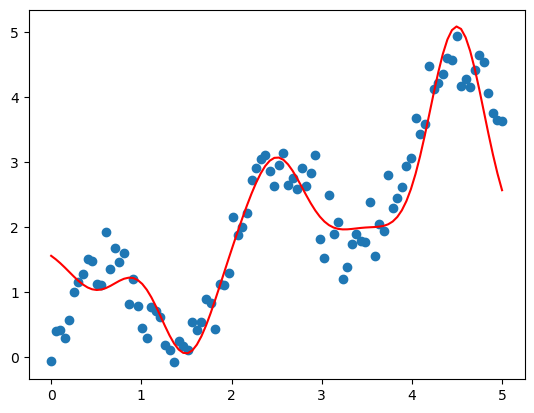

In [52]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.72620466 -1.83462409  1.09615001 -0.01194894  3.09093005]
interception:  1.877906975572715


#### Comparison

In [54]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

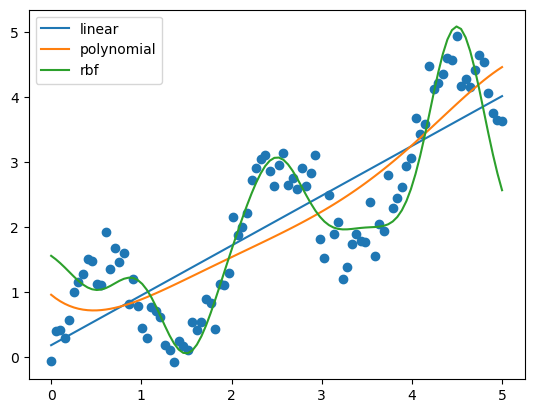

In [56]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [58]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5678572292421076


In [60]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5074891092593706


In [62]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2297885630640906
